In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
import datetime
%matplotlib inline
import statsmodels
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import acf, pacf
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import scipy.stats as ss
#import pingouin as pg
#from pingouin import corr
import scipy.signal as sig
ccfpath = r'G:\My Drive\tide_induced_gw_level\spreadsheets\no_rain_ts\g580a'

312
Tide and well
n= 220
rmax= 0.31390506130606644
p-value=  1.0168180173287201e-06
lag=  99

Head water and well
rmax= 0.32334468014763157
p-value=  4.768771240428236e-07
lag=  40


<Figure size 360x216 with 0 Axes>

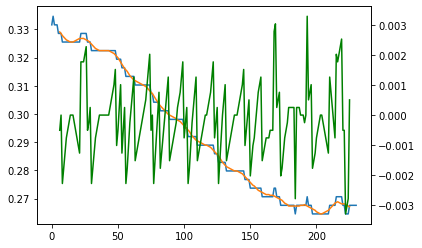

In [2]:
tspath = os.path.join( ccfpath, 'g580a_2019.csv') 
df = pd.read_csv(tspath)
print(len(df))
df= df.loc[0:230]
well = df['well']*0.3048
trend_well = well.rolling(12,center=True).mean()
de_well = well - trend_well

tide = df['tide']*0.3048
trend_tide =tide.rolling(12,center=True).mean()
de_tide = tide - trend_tide
#np.savetxt('test.csv',de_tide)

dw = de_well[~np.isnan(de_well)]
dt = de_tide[~np.isnan(de_tide)]
dw = np.array(dw)
dt = np.array(dt)

r = sig.correlate(dw - np.mean(dw), dt - np.mean(dt), method='direct') / (np.std(dw) * np.std(dt) * len(dw))
lags = sig.correlation_lags(len(dw), len(dt))
halfr = int(len(r)/2)+1
r1 = r[:halfr]
lag = r.argmax() - (len(dt) - 1)

print('Tide and well')
rmax = np.max(r)

n = len(dw)
print('n=',n)
lag = r.argmax() - (len(dt) - 1)
print('rmax=',rmax)
t = (rmax*((n-2)**0.5))/((1-rmax**2)**0.5)
p = ss.t.sf(abs(t), df=n-2)
print('p-value= ',p)    
print('lag= ',lag)  

hw = df['hw']
trend_hw =hw.rolling(12,center=True).mean()
de_hw = hw - trend_hw

dh = de_hw[~np.isnan(de_hw)]
dh = np.array(dh)

rhw = sig.correlate(dw - np.mean(dw), dh - np.mean(dh), method='direct') / (np.std(dw) * np.std(dh) * len(dw))
laghw = rhw.argmax() - (len(dt) - 1)

print('')
print('Head water and well')
rhwmax = np.max(rhw)
print('rmax=',rhwmax)
thw = (rhwmax*((n-2)**0.5))/((1-rhwmax**2)**0.5)
phw = ss.t.sf(abs(thw), df=n-2)
print('p-value= ',phw)    
print('lag= ',laghw)

fig = plt.figure(figsize=(5,3))
fig,ax=plt.subplots()
ax2 = ax.twinx()
ax.plot(well)
ax.plot(trend_well)
ax2.plot(de_well, color ='green')

(-10.0, 10.0)

<Figure size 360x216 with 0 Axes>

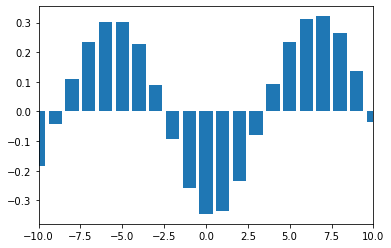

In [19]:
fig = plt.figure(figsize=(5,3))
fig,ax=plt.subplots()
ax.bar(lags,r)
ax.set_xlim(-10,10)

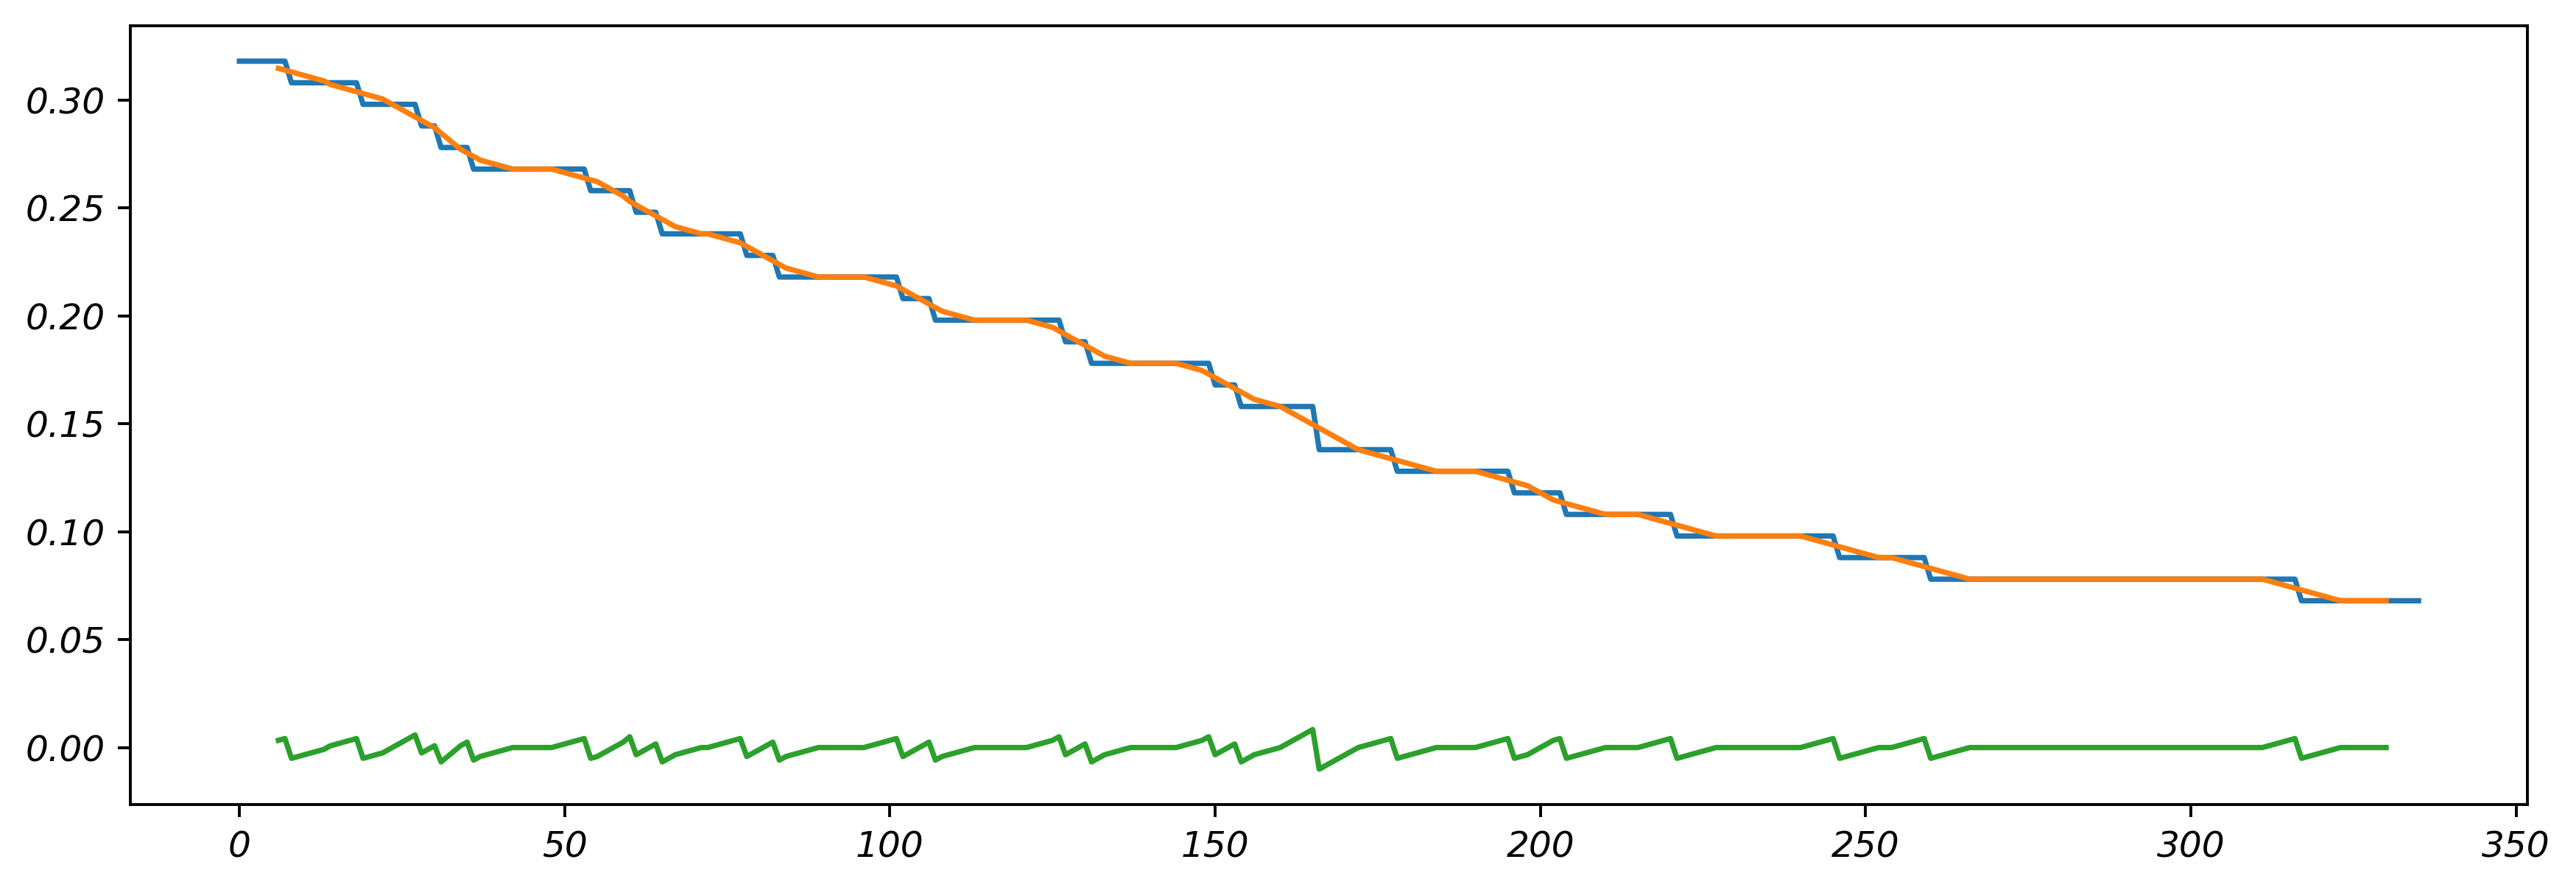

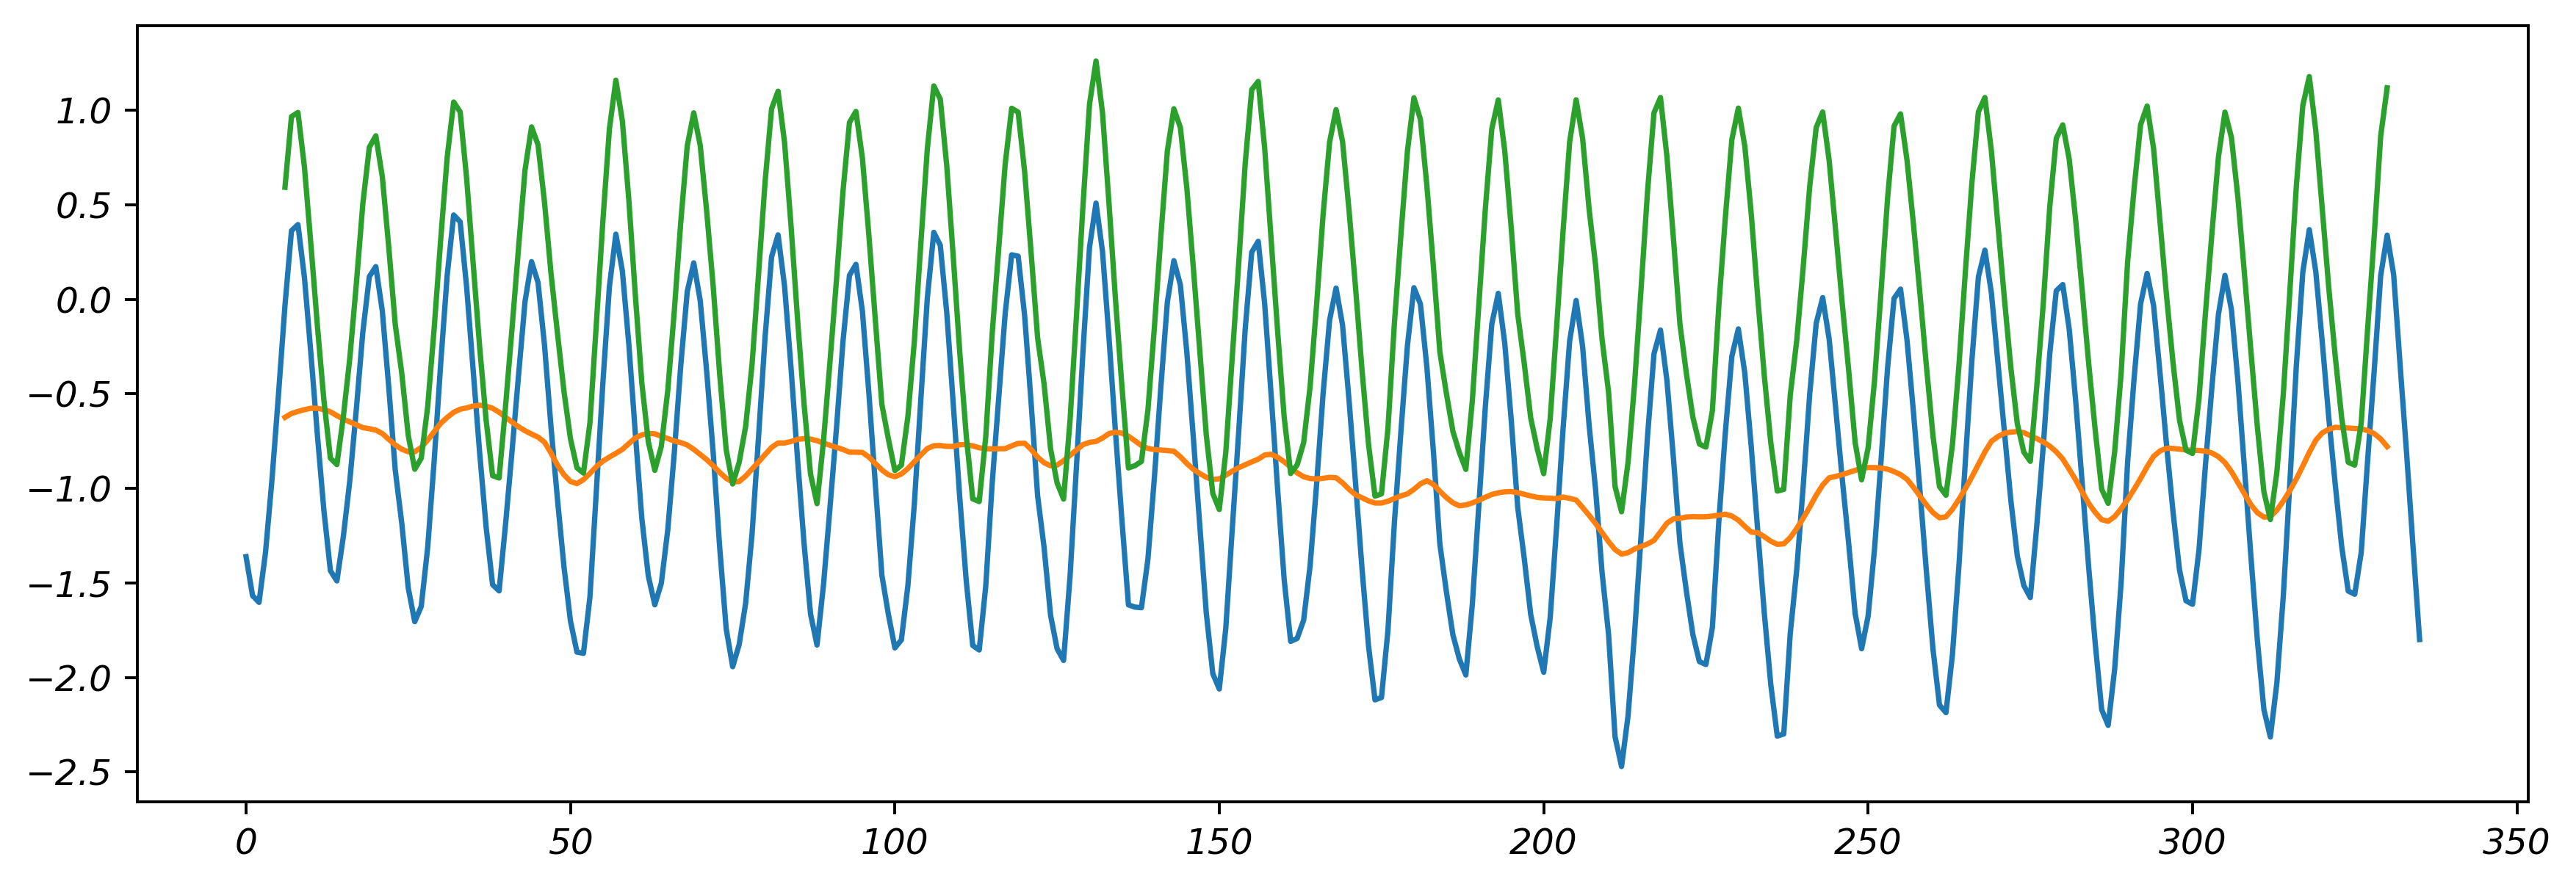

In [9]:
well = df['well']
trend_well = well.rolling(12,center=True).mean()
de_well = well - trend_well
fig, ax = plt.subplots(1, 1,  figsize=(12, 4))
ax.plot(well)
ax.plot(trend_well)
ax.plot(de_well)

tide = df['tide']
trend_tide =tide.rolling(12,center=True).mean()
de_tide = tide - trend_tide
fig, ax = plt.subplots(1, 1,  figsize=(12, 4))
ax.plot(tide)
ax.plot(trend_tide)
ax.plot(de_tide)

hw = df['hw']
trend_hw =hw.rolling(12).mean()
de_hw = hw - trend_hw

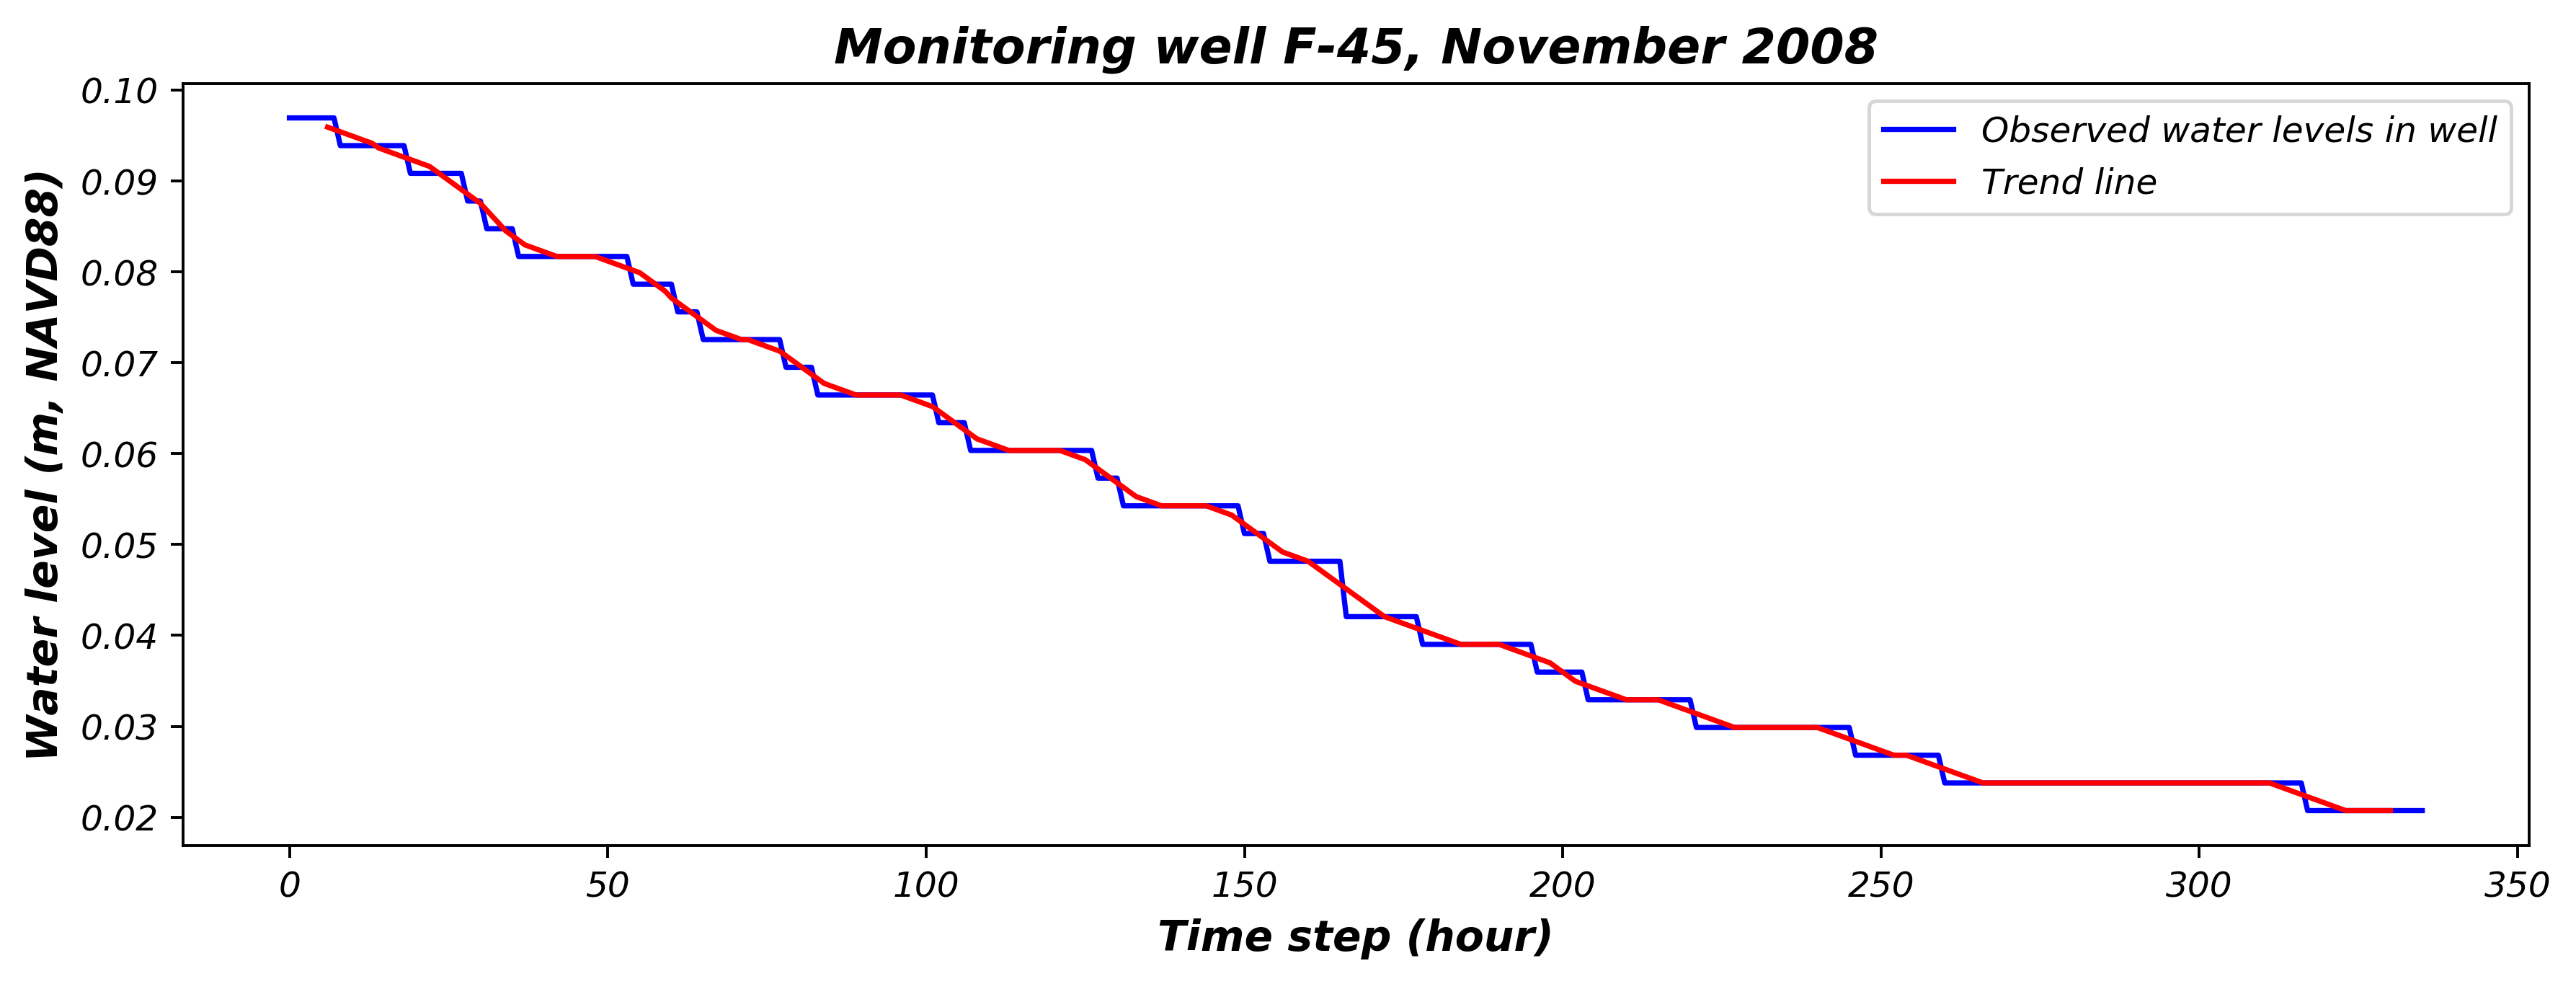

In [114]:
import matplotlib.ft2font as ft
import matplotlib.font_manager as font_manager
mpl.rcParams['figure.dpi'] = 350
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 14

fig, ax = plt.subplots(1, 1,  figsize=(12, 4))
ax.plot(well,color = 'blue', label = 'Observed water levels in well')
ax.plot(trend_well, color = 'red', label = 'Trend line')
ax.set_ylabel("Water level (m, NAVD88)")
ax.set_xlabel("Time step (hour)")
#ax.set_title("Monitoring well G-3549, November 2010")
ax.set_title("Monitoring well F-45, November 2008")
ax.legend(loc='upper right')

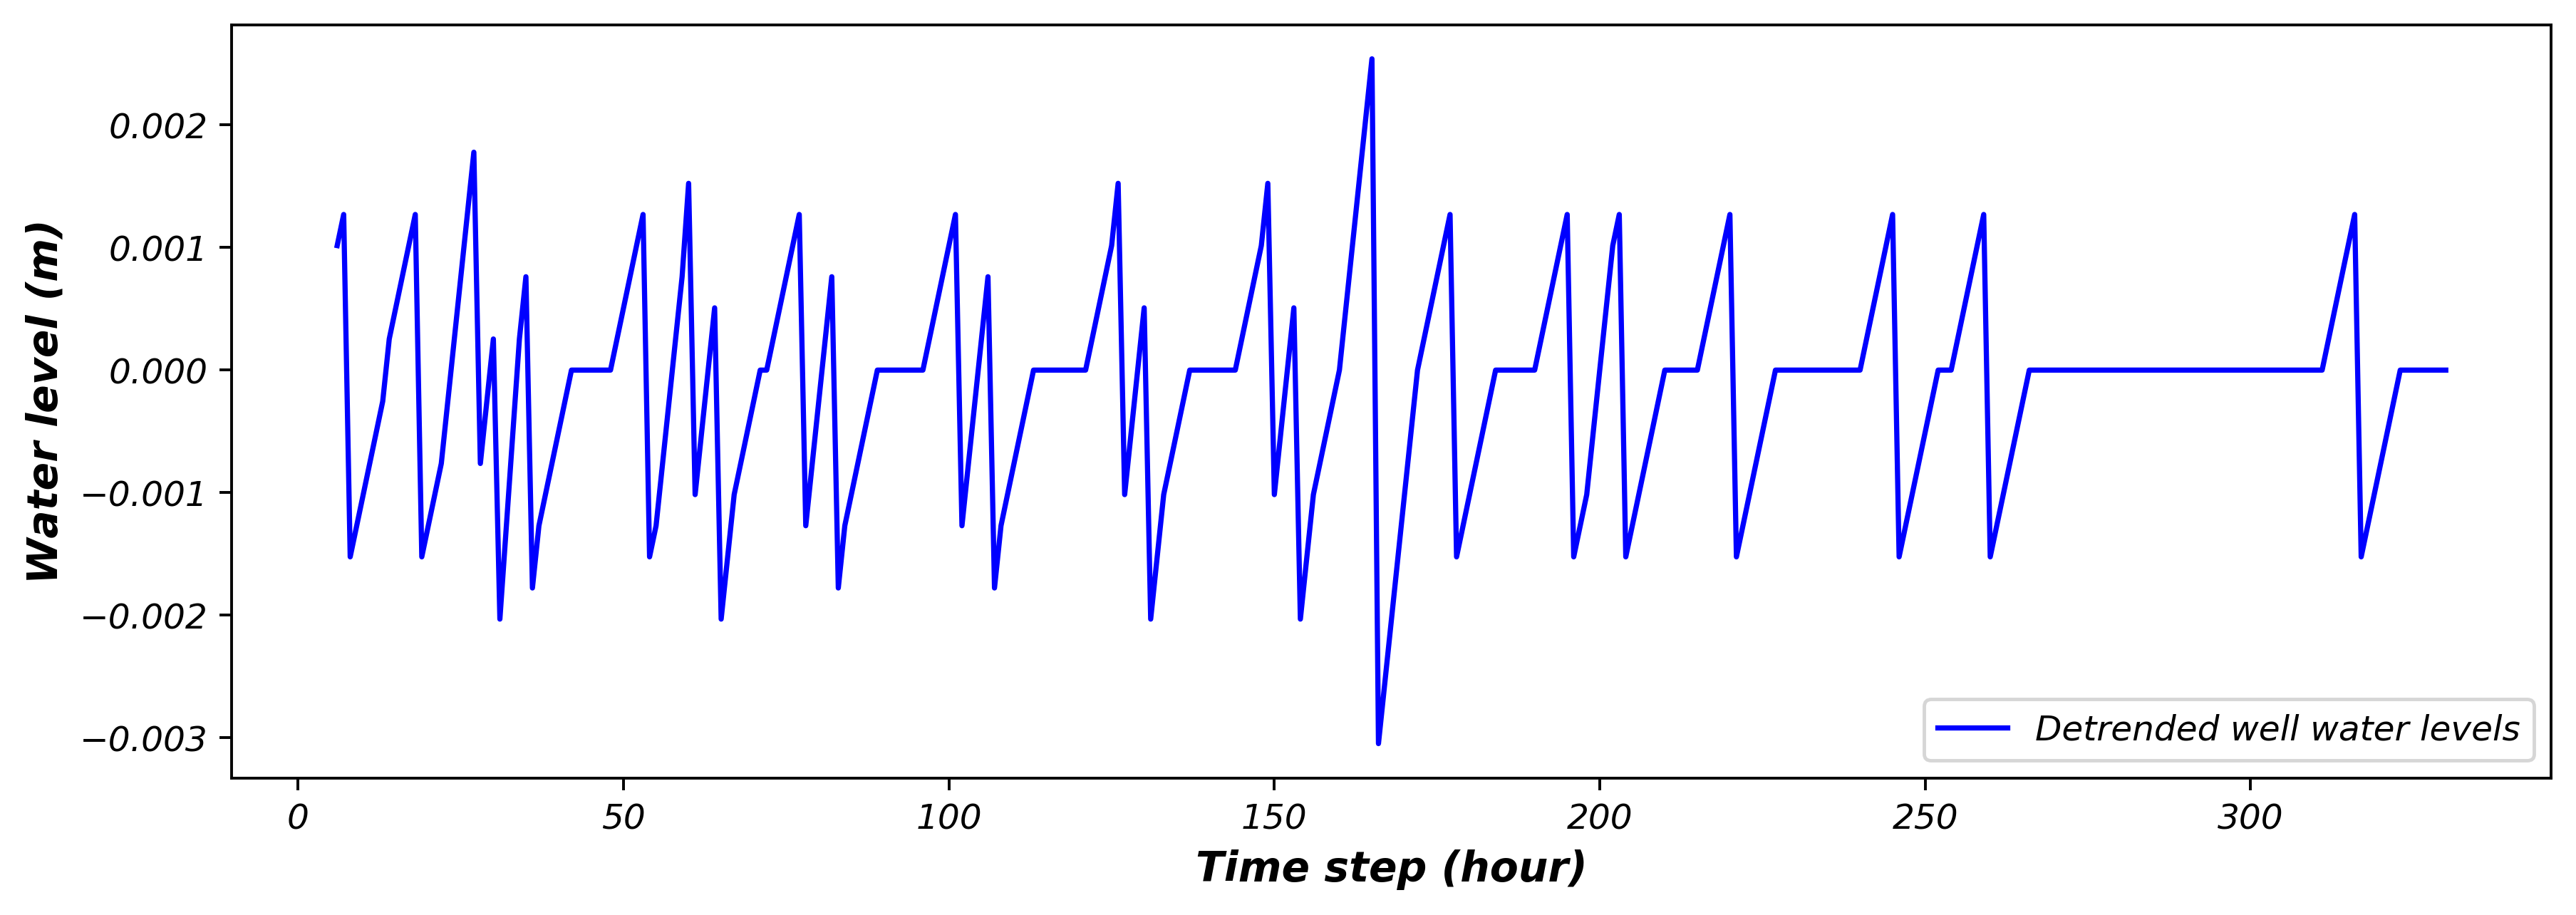

In [115]:
fig, ax = plt.subplots(1, 1,  figsize=(12, 4))
ax.plot(de_well, color= 'blue', label = 'Detrended well water levels')
ax.set_ylabel("Water level (m)")
ax.set_xlabel("Time step (hour)")
#ax.set_title("Monitoring well F-45, January 2008")
ax.legend(loc='lower right')

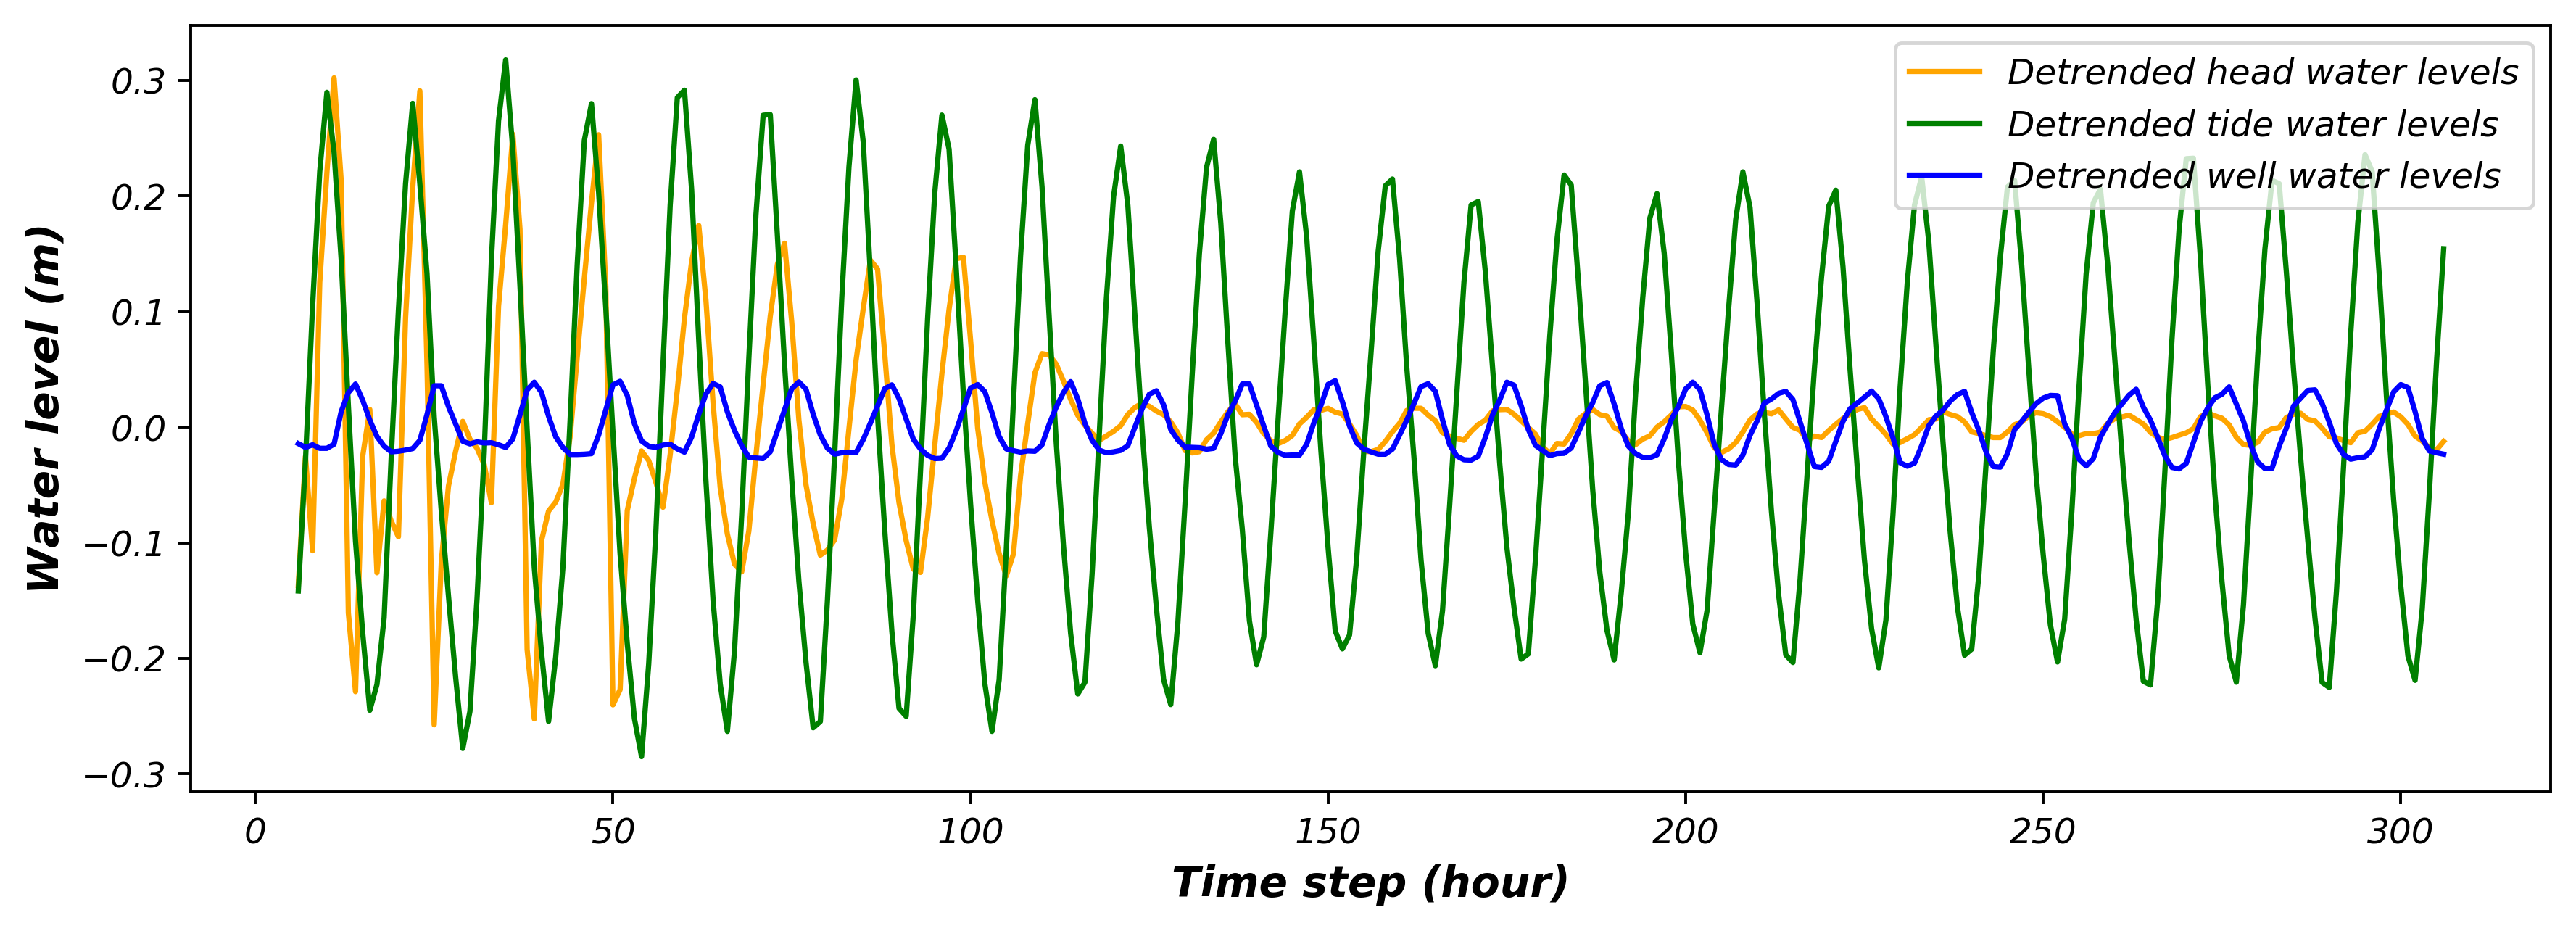

In [24]:
fig, ax = plt.subplots(1, 1,  figsize=(12, 4))
ax.plot(de_hw, color= 'orange', label = 'Detrended head water levels')
ax.plot(de_tide, color= 'green', label = 'Detrended tide water levels')
ax.plot(de_well, color= 'blue', label = 'Detrended well water levels')
ax.set_ylabel("Water level (m)")
ax.set_xlabel("Time step (hour)")
#ax.set_title("Monitoring well G-3549, November 2007")
ax.legend(loc='upper right')